# 5.4. 무선청소기 모델 별 비교 분석하기

## 5.4.1. 데이터 살펴보기

In [10]:
import pandas as pd
danawa_data = pd.read_excel('./files/3_2_danawa_data_final.xlsx')
danawa_data.info()
danawa_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 6 columns):
카테고리    247 non-null object
회사명     247 non-null object
제품      247 non-null object
가격      247 non-null int64
사용시간    219 non-null float64
흡입력     124 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.7+ KB


,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V9,137700,60.0,120.0
1,핸디/스틱청소기,LG전자,코드제로 A9 A958,775840,80.0,140.0
2,핸디/스틱청소기,LG전자,코드제로 A9 A978,981320,80.0,140.0
3,핸디/스틱청소기,DIBEA,F20 맥스,183840,50.0,250.0
4,핸디/스틱청소기,LG전자,코드제로 A9 A951,918650,80.0,140.0


In [11]:
top_list = danawa_data.sort_values(["흡입력"], ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
114,핸디/스틱청소기,벡셀,BHV-3001S,267420,35.0,300.0
62,핸디/스틱청소기,DIBEA,X30,239000,50.0,250.0
3,핸디/스틱청소기,DIBEA,F20 맥스,183840,50.0,250.0
20,핸디/스틱청소기,DIBEA,F20 울트라 맥스,192720,60.0,250.0
107,핸디/스틱청소기,샤오미,로이드미 넥스,341480,60.0,235.0


In [12]:
top_list = danawa_data.sort_values(["사용시간"], ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
199,핸디/스틱청소기,샤오미,이지에 YE-01,19300,120.0,NaN
6,핸디/스틱청소기,삼성전자,제트 VS20R9074S3,733660,120.0,200.0
173,핸디/스틱청소기,노블,K-108L,47160,120.0,NaN
228,핸디/스틱청소기,삼성전자,제트 VS20R9074S2,1036970,120.0,200.0
13,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,881300,120.0,200.0


In [13]:
# 흡입력 & 사용시간 TOP 리스트
top_list = danawa_data.sort_values(["사용시간","흡입력"], ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
6,핸디/스틱청소기,삼성전자,제트 VS20R9074S3,733660,120.0,200.0
9,핸디/스틱청소기,삼성전자,제트 VS20R9078S3,909140,120.0,200.0
13,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,881300,120.0,200.0
120,핸디/스틱청소기,삼성전자,제트 VS20R9077Q3,1015550,120.0,200.0
228,핸디/스틱청소기,삼성전자,제트 VS20R9074S2,1036970,120.0,200.0


## 5.4.2. 가성비 좋은 제품 살펴보기 

In [14]:
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()

print("가격 평균값", price_mean_value)
print("흡입력 평균값", suction_mean_value)
print("사용시간 평균값", use_time_mean_value)

가격 평균값 289201.46153846156
흡입력 평균값 140.06451612903226
사용시간 평균값 41.4337899543379


In [18]:
condition_data = danawa_data[
    (danawa_data ['가격'] <= price_mean_value) & 
    (danawa_data ['흡입력'] >= suction_mean_value) & 
    (danawa_data ['사용시간'] >= use_time_mean_value)]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
3,핸디/스틱청소기,DIBEA,F20 맥스,183840,50.0,250.0
20,핸디/스틱청소기,DIBEA,F20 울트라 맥스,192720,60.0,250.0
62,핸디/스틱청소기,DIBEA,X30,239000,50.0,250.0
191,핸디/스틱청소기,캐치웰,CX11,182950,60.0,200.0


## 5.4.3. 데이터 시각화 해보기 

In [19]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform 

# 그래프에서 한글 표기를 위한 글자체 변경(윈도우, 맥os 각각의 경우에 대해서 처리)
font_path = ''
if platform.system() == 'Windows': 
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')
    
%matplotlib inline


In [20]:
chart_data = danawa_data.dropna(axis=0)
len(chart_data)

117

In [21]:
# 흡입력, 사용사간 최대, 최소
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

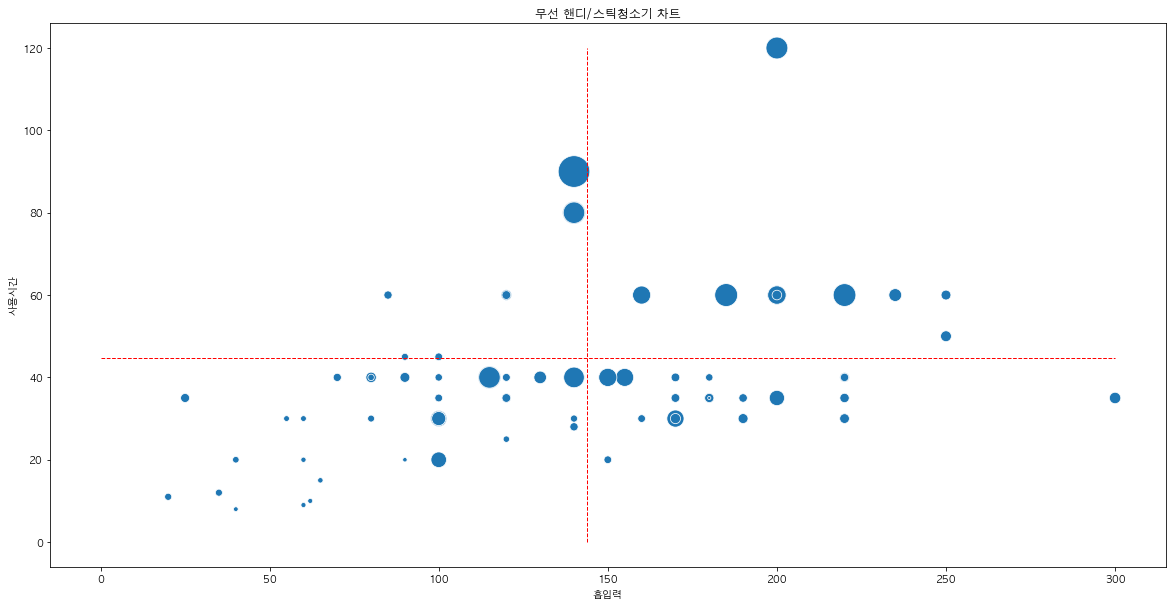

In [23]:
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 차트")
sns.scatterplot(x='흡입력',y='사용시간',size='가격',data=chart_data, sizes=(10, 1000), legend=False)
plt.plot([0, suction_max_value], [use_time_mean_value, use_time_mean_value], 'r--', lw=1, )
plt.plot([suction_mean_value, suction_mean_value], [0, use_time_max_value], 'r--', lw=1)
plt.show()

## 5.4.4.	인기순 제품 데이터 시각화 해보기 

In [24]:
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

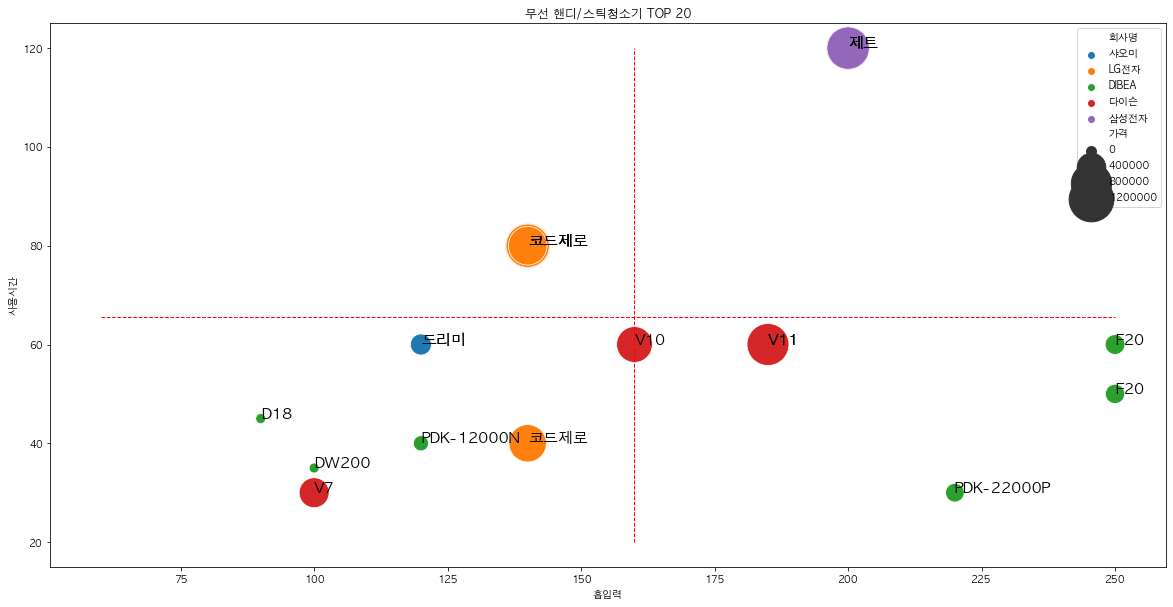

In [28]:
# 흡입력 사용시간 최대, 최소
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 TOP 20")
sns.scatterplot(x='흡입력', 
                y='사용시간', 
                size='가격', 
                hue=chart_data_selected['회사명'], 
                data=chart_data_selected, sizes=(100, 2000))
plt.plot([60, suction_max_value], [use_time_mean_value, use_time_mean_value], 'r--', lw=1, )
plt.plot([suction_mean_value, suction_mean_value], [20, use_time_max_value], 'r--', lw=1)

for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=15)

plt.show()